### Tensorflow分类任务:

读取Mnist数据集
- 会自动进行下载

In [1]:
%matplotlib inline

e:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
e:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
e:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [3]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

784是mnist数据集每个样本的像素点个数

(50000, 784)


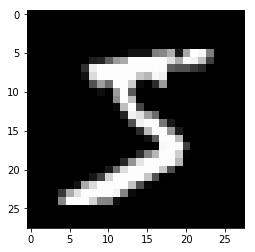

In [4]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

<img src="./img/4.png" alt="FAO" width="790">

<img src="./img/5.png" alt="FAO" width="790">

In [5]:
y_train[0]

5

In [7]:
import tensorflow as tf
from tensorflow.keras import layers

In [8]:
model = tf.keras.Sequential()
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

选择损失和评估函数时候需要选择合适的,Api参考：https://tensorflow.google.cn/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy?version=stable

一定选择合适的损失函数

In [9]:
tf.losses.CategoricalCrossentropy

tensorflow.python.keras.losses.CategoricalCrossentropy

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss=tf.losses.CategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [11]:
model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1s 29us/sample - loss: 115566.6051 - sparse_categorical_accuracy: 0.1122 - val_loss: 364928.5786 - val_sparse_categorical_accuracy: 0.1064
Epoch 2/5
50000/50000 [==============================] - 1s 21us/sample - loss: 837104.4266 - sparse_categorical_accuracy: 0.1136 - val_loss: 1323287.7028 - val_sparse_categorical_accuracy: 0.1064
Epoch 3/5
50000/50000 [==============================] - 1s 20us/sample - loss: 1892431.2655 - sparse_categorical_accuracy: 0.1136 - val_loss: 2448062.2680 - val_sparse_categorical_accuracy: 0.1064
Epoch 4/5
50000/50000 [==============================] - 1s 20us/sample - loss: 3131130.1347 - sparse_categorical_accuracy: 0.1136 - val_loss: 3773744.5348 - val_sparse_categorical_accuracy: 0.1064
Epoch 5/5
50000/50000 [==============================] - 1s 20us/sample - loss: 4527781.6930 - sparse_categorical_accuracy: 0.1136 - val_loss: 5207194.3728 - val

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.005),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [17]:
model.fit(x_train, y_train, epochs=5, batch_size=64,
          validation_data=(x_valid, y_valid))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1s 26us/sample - loss: 13.7217 - sparse_categorical_accuracy: 0.7941 - val_loss: 7.9519 - val_sparse_categorical_accuracy: 0.8099
Epoch 2/5
50000/50000 [==============================] - 1s 20us/sample - loss: 4.7395 - sparse_categorical_accuracy: 0.8558 - val_loss: 2.8499 - val_sparse_categorical_accuracy: 0.8835
Epoch 3/5
50000/50000 [==============================] - 1s 19us/sample - loss: 2.7581 - sparse_categorical_accuracy: 0.8634 - val_loss: 2.0057 - val_sparse_categorical_accuracy: 0.8758
Epoch 4/5
50000/50000 [==============================] - 1s 19us/sample - loss: 1.6430 - sparse_categorical_accuracy: 0.8665 - val_loss: 1.2553 - val_sparse_categorical_accuracy: 0.8617
Epoch 5/5
50000/50000 [==============================] - 1s 20us/sample - loss: 1.1192 - sparse_categorical_accuracy: 0.8660 - val_loss: 1.2014 - val_sparse_categorical_accuracy: 0.8474


### tf.data模块常用函数

In [37]:
import numpy as np
input_data = np.arange(16)
input_data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [38]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)


#### repeat操作

In [39]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2)
for data in dataset:
    print (data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(11, shape=(

#### batch操作

In [41]:
dataset = tf.data.Dataset.from_tensor_slices(input_data)
dataset = dataset.repeat(2).batch(4)
for data in dataset:
    print (data)

tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int32)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int32)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int32)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int32)
tf.Tensor([12 13 14 15], shape=(4,), dtype=int32)


#### shuffle操作

In [42]:
dataset = tf.data.Dataset.from_tensor_slices(input_data).shuffle(buffer_size=10).batch(4)
for data in dataset:
    print (data)

tf.Tensor([ 9  8 11  3], shape=(4,), dtype=int32)
tf.Tensor([ 5  6  1 13], shape=(4,), dtype=int32)
tf.Tensor([14 15  4  2], shape=(4,), dtype=int32)
tf.Tensor([12  7  0 10], shape=(4,), dtype=int32)


#### 重新训练

In [15]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train = train.batch(32)
train = train.repeat()

valid = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
valid = valid.batch(32)
valid = valid.repeat()

model.fit(train, epochs=5,steps_per_epoch=100, validation_data=valid,validation_steps=100)

Train for 100 steps, validate for 100 steps
Epoch 1/5
100/100 [==============================] - 0s 3ms/step - loss: 0.0812 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.1655 - val_sparse_categorical_accuracy: 0.9522
Epoch 2/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0632 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.1667 - val_sparse_categorical_accuracy: 0.9500
Epoch 3/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0960 - sparse_categorical_accuracy: 0.9741 - val_loss: 0.1526 - val_sparse_categorical_accuracy: 0.9534
Epoch 4/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9791 - val_loss: 0.2006 - val_sparse_categorical_accuracy: 0.9459
Epoch 5/5
100/100 [==============================] - 0s 2ms/step - loss: 0.0752 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.1866 - val_sparse_categorical_accuracy: 0.9441


### 练手的fashion数据集

In [44]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 16s 4us/step


In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [46]:
train_images.shape

(60000, 28, 28)

In [47]:
len(train_labels)

60000

In [48]:
test_images.shape

(10000, 28, 28)

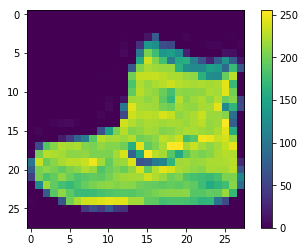

In [50]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [51]:
train_images = train_images / 255.0

test_images = test_images / 255.0

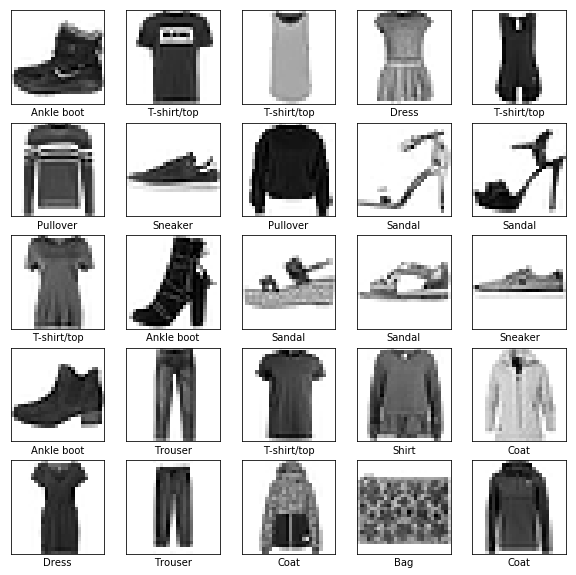

In [52]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [53]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4988 - accuracy: 0.8251
Epoch 2/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3772 - accuracy: 0.8636
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3365 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3119 - accuracy: 0.8857
Epoch 5/10
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2946 - accuracy: 0.8909
Epoch 6/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2808 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2703 - accuracy: 0.8992
Epoch 8/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2571 - accuracy: 0.9044
Epoch 9/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2486 - accuracy: 0.9072
Epoch 10/10
60

### 评估操作

In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2213 - accuracy: 0.8855

Test accuracy: 0.8855


In [58]:
predictions = model.predict(test_images)

In [59]:
predictions.shape

(10000, 10)

In [60]:
predictions[0]

array([4.8777247e-07, 3.9181505e-11, 8.9336044e-10, 1.6037728e-11,
       2.3447463e-10, 2.7668450e-04, 7.0999513e-09, 5.5328775e-03,
       3.6626222e-08, 9.9418998e-01], dtype=float32)

In [61]:
np.argmax(predictions[0])

9

In [63]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

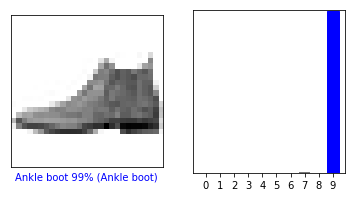

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

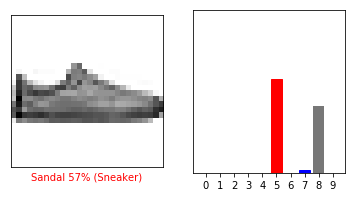

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

### 保存训练好的模型

保存权重参数与网络模型

In [66]:
model.save('fashion_model.h5')

网络架构

In [73]:
config = model.to_json()
config

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularize

In [74]:
with open('config.json', 'w') as json:
    json.write(config)

In [68]:
model = keras.models.model_from_json(json_config)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


权重参数

In [71]:
weights = model.get_weights()
weights

[array([[ 0.05470262,  0.01263735, -0.07127223, ..., -0.0664937 ,
          0.07759319, -0.05615212],
        [ 0.01245607,  0.07130215,  0.080436  , ...,  0.03362866,
         -0.06253833,  0.03643914],
        [-0.03965751,  0.04049407, -0.07298152, ...,  0.04678986,
         -0.07160556,  0.00132482],
        ...,
        [-0.0612221 ,  0.01334414,  0.03583702, ..., -0.00132392,
          0.0776858 ,  0.0605113 ],
        [ 0.01501167,  0.05460579,  0.03314714, ...,  0.01253406,
          0.05784706, -0.04537096],
        [-0.07859673,  0.00169475, -0.0504358 , ..., -0.0354383 ,
         -0.07151209,  0.06243347]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [75]:
model.save_weights('weights.h5')

In [76]:
model.load_weights('weights.h5')